# What are the fraction of mutations we included?

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import re

In [4]:
OUT_DIR = "scope_output_kmeans"

In [36]:
def get_counts(STR, OUT_DIR):

    mutation_group_df = pd.read_parquet(f"../data/simulation/ground_truth/{STR}/sim_mutation_group.parquet")
    mutation_count = len(mutation_group_df)

    file_path = f"../data/simulation/{OUT_DIR}/{STR}/summary.txt"

    with open(file_path, "r") as f:
        content = f.read()

        match = re.search(r"#UNIQUE SOLUTIONS:\s*(\d+)\s*WITH VALUE\s*([\d\.]+)\s+", content)

        if match:
            num_solutions = int(match.group(1))
            num_mutations_taken = int(float(match.group(2)))
        else:
            raise ValueError("Match File Not Found")

    return mutation_count, num_mutations_taken, num_mutations_taken / mutation_count

In [37]:
def make_results_df(fn):
    # parameters
    ncells = [1000, 5000, 10000]
    n_mutation_groups = [5, 10, 15]
    mutation_group_sizes = [100, 500, 1000]
    nclusters = [5, 10, 15]
    coverages = [0.02, 0.05, 0.1]
    seeds = np.arange(5)

    ncells_list = []
    n_mutation_groups_list = []
    mutation_group_sizes_list = []
    n_clusters_list = []
    coverages_list = []
    seeds_list = []
    value_a_list = []
    value_b_list = []
    value_c_list = []
    failures_list = []

    for ncell in ncells:
        for n_mutation_group in n_mutation_groups:
            for mutation_group_size in mutation_group_sizes:
                for coverage in coverages:
                    for ncluster in nclusters:
                        for seed in seeds:
                            ncells_list.append(ncell)
                            n_mutation_groups_list.append(n_mutation_group)
                            mutation_group_sizes_list.append(mutation_group_size)
                            coverages_list.append(coverage)
                            n_clusters_list.append(ncluster)
                            seeds_list.append(seed)
                            try:
                                SIMULATION_STR = f'n{ncell}_m{n_mutation_group}_size{mutation_group_size}_cov{str(coverage)}_p{ncluster}_s{seed}'
                                a, b, c = fn(SIMULATION_STR)
                                value_a_list.append(a)
                                value_b_list.append(b)
                                value_c_list.append(c)
                                failures_list.append(None)
                            except Exception as e:
                                value_a_list.append(None)
                                value_b_list.append(None)
                                value_c_list.append(None)
                                failures_list.append(e)

    results_df = pd.DataFrame({
        'ncells': ncells_list,
        'n_mutation_groups': n_mutation_groups_list,
        'mutation_group_size': mutation_group_sizes_list,
        'coverage': coverages_list,
        'n_clusters': n_clusters_list,
        'seed': seeds_list,
        'A': value_a_list,
        'B': value_b_list,
        'C': value_c_list,
        'error': failures_list,
    })

    return results_df
    

In [38]:
df1 = make_results_df(lambda STR: get_counts(STR, "scope_output"))
df2 = make_results_df(lambda STR: get_counts(STR, "scope_output_kmeans_known_k"))
df3 = make_results_df(lambda STR: get_counts(STR, "scope_output_kmeans"))

df1

,ncells,n_mutation_groups,mutation_group_size,coverage,n_clusters,seed,A,B,C,error
0,1000,5,100,0.02,5,0,461,461,1.0,None
1,1000,5,100,0.02,5,1,524,524,1.0,None
2,1000,5,100,0.02,5,2,512,512,1.0,None
3,1000,5,100,0.02,5,3,514,514,1.0,None
4,1000,5,100,0.02,5,4,523,523,1.0,None
...,...,...,...,...,...,...,...,...,...,...
1210,10000,15,1000,0.10,15,0,15070,15070,1.0,None
1211,10000,15,1000,0.10,15,1,14950,14950,1.0,None
1212,10000,15,1000,0.10,15,2,15255,15255,1.0,None
1213,10000,15,1000,0.10,15,3,14878,14878,1.0,None


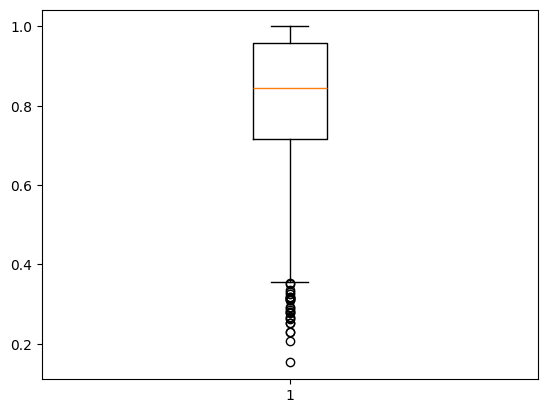

In [30]:
plt.boxplot(df[~df['C'].isna()]['C'].to_numpy())
plt.show()

In [31]:
STR = "n10000_m15_size1000_cov0.05_p5_s2"

def get_counts_phertilizer(STR):

    mutation_group_df = pd.read_parquet(f"../data/simulation/ground_truth/{STR}/sim_mutation_group.parquet")
    mutation_count = len(mutation_group_df)

    file_path = f"../data/simulation/{OUT_DIR}/{STR}/summary.txt"

    snv_cluster_df = pd.read_csv(f"../data/simulation/phertilizer_output/{STR}/snv_clusters.csv")

    num_mutations_taken = len(snv_cluster_df)

    return mutation_count, num_mutations_taken, num_mutations_taken / mutation_count

get_counts(STR)

(15065, 11625, 0.7716561566544972)

In [39]:
dfp = make_results_df(get_counts_phertilizer)
dfp

,ncells,n_mutation_groups,mutation_group_size,coverage,n_clusters,seed,A,B,C,error
0,1000,5,100,0.02,5,0,461.0,425.0,0.921909,None
1,1000,5,100,0.02,5,1,524.0,524.0,1.000000,None
2,1000,5,100,0.02,5,2,512.0,468.0,0.914062,None
3,1000,5,100,0.02,5,3,514.0,422.0,0.821012,None
4,1000,5,100,0.02,5,4,523.0,491.0,0.938815,None
...,...,...,...,...,...,...,...,...,...,...
1210,10000,15,1000,0.10,15,0,15070.0,14945.0,0.991705,None
1211,10000,15,1000,0.10,15,1,NaN,NaN,NaN,[Errno 2] No such file or directory: '../data/...
1212,10000,15,1000,0.10,15,2,15255.0,13996.0,0.917470,None
1213,10000,15,1000,0.10,15,3,14878.0,14328.0,0.963033,None


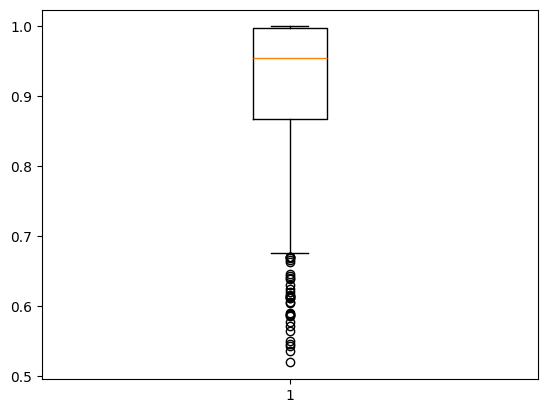

In [33]:
plt.boxplot(df2[~df2['C'].isna()]['C'].to_numpy())
plt.show()

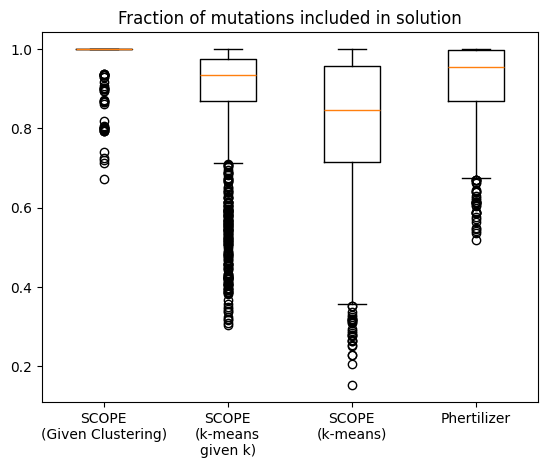

In [42]:
plt.boxplot(
    [
    df1[~df1['C'].isna()]['C'].to_numpy(), 
    df2[~df2['C'].isna()]['C'].to_numpy(),
    df3[~df3['C'].isna()]['C'].to_numpy(), 
    dfp[~dfp['C'].isna()]['C'].to_numpy()
    ],
    tick_labels=['SCOPE\n(Given Clustering)', 'SCOPE\n(k-means\ngiven k)', 'SCOPE\n(k-means)', 'Phertilizer'])
plt.title("Fraction of mutations included in solution")
plt.show()

# Let's see an instance

In [ ]:
import pandas as pd
import numpy as np
from scipy.spatial.distance import cdist
import os


In [132]:
def post(STR):

    OUT_DIR = "scope_output_kmeans_known_k"
    INP_DIR = "scope_input_kmeans_known_k"

    F_bar = pd.read_csv(f"../data/simulation/{INP_DIR}/{STR}/F_bar.csv", index_col=0)
    kmeans_clones = pd.read_csv(f"../data/simulation/{INP_DIR}/{STR}/kmeans_clones.csv", index_col=0)

    X = pd.read_csv(f"../data/simulation/{OUT_DIR}/{STR}/solution_0/X.csv", index_col=0)
    mutation_groups_selected = X[X['0'] > 0.5].index.tolist()
    mutation_groups_not_selected = X[X['0'] < 0.5].index.tolist()

    input_prefix = f"../data/simulation/ground_truth/{STR}/sim"

    df_total = pd.read_parquet(f"{input_prefix}_read_count.parquet")
    df_variant = pd.read_parquet(f"{input_prefix}_variant_count.parquet")
    df = pd.read_parquet(f"{input_prefix}_character_matrix_without_noise.parquet")
    df_copy_number = pd.read_parquet(f"{input_prefix}_copy_numbers.parquet")

    df_cluster = df[['cluster_id']]

    df_total = df_total.join(df_cluster, how='left')
    df_variant = df_variant.join(df_cluster, how='left')
    df_copy_number = df_copy_number.join(df_cluster, how='left')

    total_table = df_total.groupby('cluster_id').sum(numeric_only=True)
    alt_table = df_variant.groupby('cluster_id').sum(numeric_only=True)
    df_cn = df_copy_number.groupby('cluster_id').mean().astype(int)

    vaf = alt_table.div(total_table).replace(np.nan, 0)
    F = (vaf * df_cn).clip(upper=1)

    kmeans_clones_X = pd.merge(kmeans_clones, X, left_on="mutation_group", right_index=True, how="left")

    mutations_not_taken = kmeans_clones_X[kmeans_clones_X['0'] < 0.5]

    F_not = F.loc[:, mutations_not_taken['mutation']]

    F_bar_t = F_bar.iloc[:, mutation_groups_selected]

    df1 = F_not
    df2 = F_bar_t

    df1_values = df1.values.T  # shape: (num_cols_df1, num_rows)
    df2_values = df2.values.T  # shape: (num_cols_df2, num_rows)

    # compute pairwise euclidean distances between all columns
    dist_matrix = cdist(df1_values, df2_values, metric='euclidean')

    # make it a DataFrame
    dist_df = pd.DataFrame(
        dist_matrix,
        index=df1.columns,   # columns of first df
        columns=df2.columns  # columns of second df
    )

    min_col_per_row = dist_df.idxmin(axis=1)
    min_col_df = min_col_per_row.rename('min_column').reset_index()
    min_col_df['mutation'] = min_col_df['index'].str[1:].astype(int)

    mutation_group_update = pd.merge(kmeans_clones_X, min_col_df[['index', 'min_column']], left_on='mutation', right_on='index', how='left')
    mutation_group_update['mutation_group'] = mutation_group_update['min_column'].combine_first(
        mutation_group_update['mutation_group']
    )

    mutation_group_update['mutation_group'] = mutation_group_update['mutation_group'].astype(str).str.strip().astype(int)

    mutation_group_update = mutation_group_update[['mutation', 'mutation_group']]
    os.makedirs(f"../data/simulation/scope_post_kmeans_known_k/{STR}", exist_ok=True)
    mutation_group_update.to_csv(f"../data/simulation/scope_post_kmeans_known_k/{STR}/kmeans_cleaned_clones.csv")


In [133]:
make_results_df(post)

: 

# Correcting for Laks et. al.

In [2]:
import pandas as pd
import numpy as np
from scipy.spatial.distance import cdist
import os

In [3]:
F_bar = pd.read_csv(f"../data/laks/scope/F_bar.csv", index_col=0)
kmeans_clones = pd.read_csv(f"../data/laks/scope/kmeans_labels_filter_25.csv", index_col=0)

X = pd.read_csv(f"../data/laks/scope/kmeans_72_filtered_25_loh/solution_0/X.csv", index_col=0)
mutation_groups_selected = X[X['0'] > 0.5].index.tolist()
mutation_groups_not_selected = X[X['0'] < 0.5].index.tolist()

# mutation_groups_not_selected = [8, 9]

mutation_groups_selected, mutation_groups_not_selected

([0, 1, 2, 3, 4, 5, 6, 7, 10, 11], [8, 9, 12, 13, 14, 15, 16, 17])

In [4]:
F = pd.read_csv("../data/laks/scope/F.csv", index_col=0)
F

,10:100129846:C:A,10:100185101:A:G,10:100209326:T:C,10:100283942:C:T,10:10086005:G:T,10:100873589:A:T,10:101108222:C:A,10:101108223:T:C,10:101427318:G:C,10:101884473:T:A,...,X:97291714:A:T,X:97396419:C:A,X:97564955:T:C,X:97583306:G:T,X:98177771:A:C,X:98278474:C:A,X:98452192:T:C,X:98700894:C:T,X:99136386:C:T,X:99571629:G:T
clone_id,,,,,,,,,,,,,,,,,,,,,
A,0.0,0.0,1.0,0.000000,0.833333,0.000000,0.000000,0.000,0.000000,1.0,...,0.0,0.000000,0.000000,0.434783,1.000000,0.000000,0.0,1.000000,0.0,0.000000
B,0.0,0.0,1.0,0.000000,1.000000,0.000000,0.000000,0.000,0.000000,1.0,...,0.0,0.000000,0.000000,0.800000,1.000000,0.000000,0.0,1.000000,0.0,0.000000
C,0.0,0.0,1.0,0.000000,0.000000,0.000000,0.066667,0.000,0.000000,1.0,...,0.0,0.000000,0.000000,0.000000,1.000000,0.000000,1.0,1.000000,0.0,0.000000
D,0.0,0.0,1.0,0.000000,0.000000,0.000000,0.000000,0.000,0.000000,1.0,...,0.0,0.000000,0.000000,0.000000,0.555556,0.000000,1.0,1.000000,0.0,0.000000
E,1.0,1.0,1.0,0.784314,0.000000,1.000000,0.625000,0.625,0.606061,1.0,...,0.0,0.769231,0.095238,0.000000,0.666667,0.000000,0.0,0.952381,1.0,0.000000
F,1.0,1.0,1.0,1.000000,0.000000,0.190476,1.000000,1.000,0.000000,1.0,...,0.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.0,1.000000,1.0,0.000000
G,0.0,0.0,1.0,0.000000,0.000000,0.000000,0.000000,0.000,0.000000,1.0,...,1.0,0.000000,1.000000,0.000000,1.000000,0.842105,0.0,1.000000,0.0,0.909091
H,0.0,0.0,1.0,0.000000,0.000000,0.000000,0.173913,0.000,0.000000,1.0,...,1.0,0.000000,1.000000,0.000000,1.000000,0.909091,0.0,1.000000,0.0,1.000000
I,0.0,0.0,1.0,0.000000,0.000000,0.000000,0.000000,0.000,0.000000,1.0,...,1.0,0.000000,1.000000,0.000000,0.869565,0.250000,0.0,1.000000,0.0,1.000000


In [5]:
kmeans_clones_X = pd.merge(kmeans_clones, X, left_on="clone", right_index=True, how="left")

mutations_not_taken = kmeans_clones_X[kmeans_clones_X['0'] < 0.5]

F_not = F.loc[:, mutations_not_taken['mutation']]

F_bar_t = F_bar.iloc[:, mutation_groups_selected]

df1 = F_not
df2 = F_bar_t

df1_values = df1.values.T  # shape: (num_cols_df1, num_rows)
df2_values = df2.values.T  # shape: (num_cols_df2, num_rows)

# compute pairwise euclidean distances between all columns
dist_matrix = cdist(df1_values, df2_values, metric='euclidean')

# make it a DataFrame
dist_df = pd.DataFrame(
    dist_matrix,
    index=df1.columns,   # columns of first df
    columns=df2.columns  # columns of second df
)

dist_df

,0,1,2,3,4,5,6,7,10,11
10:100283942:C:T,1.816988,0.215686,2.568972,2.081209,1.000123,1.667243,2.148290,1.678585,1.480596,1.741736
10:101108222:C:A,1.662464,0.418707,2.500310,2.007608,1.032141,1.576836,2.019279,1.621054,1.415037,1.674615
10:101108223:T:C,1.754116,0.375000,2.587222,2.026551,1.015197,1.598492,2.095382,1.610318,1.402726,1.765636
10:105451574:T:G,1.479887,1.582329,2.675382,1.245703,1.069470,1.291634,1.871835,0.387137,0.597778,2.332443
10:106948639:T:C,1.782907,0.298246,2.577216,2.051522,1.004815,1.630034,2.119542,1.641633,1.438567,1.752355
...,...,...,...,...,...,...,...,...,...,...
X:82405873:C:T,2.651308,2.236068,1.341428,2.161444,2.457641,2.261131,2.449490,2.569533,2.752638,2.000260
X:86264297:C:T,0.414305,1.688135,2.607851,1.888408,1.220574,1.419279,1.117047,1.432585,1.194494,1.784466
X:9220684:T:A,2.220635,2.213997,0.618742,2.275620,2.437577,2.466402,1.975293,2.442932,2.605425,1.379428
X:93270163:G:C,1.565760,1.662921,2.630340,1.174527,1.185456,1.350080,1.940440,0.310447,0.507106,2.387851


In [6]:
min_col_per_row = dist_df.idxmin(axis=1)
min_col_df = min_col_per_row.rename('min_column').reset_index()
min_col_df['mutation'] = min_col_df['index']
min_col_df

,index,min_column,mutation
0,10:100283942:C:T,1,10:100283942:C:T
1,10:101108222:C:A,1,10:101108222:C:A
2,10:101108223:T:C,1,10:101108223:T:C
3,10:105451574:T:G,7,10:105451574:T:G
4,10:106948639:T:C,1,10:106948639:T:C
...,...,...,...
2641,X:82405873:C:T,2,X:82405873:C:T
2642,X:86264297:C:T,0,X:86264297:C:T
2643,X:9220684:T:A,2,X:9220684:T:A
2644,X:93270163:G:C,7,X:93270163:G:C


In [7]:
min_col_df['min_column'].value_counts()

min_column
2     1024
1      928
3      222
7      166
5      146
11      59
6       38
10      30
0       19
4       14
Name: count, dtype: int64

In [8]:
# import pandas as pd
# import numpy as np

# # df_dist is your distance DataFrame
# dist_values = dist_df.values  # convert to numpy array

# # Compute row-wise confidences
# conf_values = np.exp(-dist_values) / np.exp(-dist_values).sum(axis=1, keepdims=True)

# # Convert back to DataFrame
# df_conf = pd.DataFrame(conf_values, index=dist_df.index, columns=dist_df.columns)
# print(df_conf.head())

In [9]:
kmeans_clones_X

,mutation,clone,0
0,10:100129846:C:A,1,1.0
1,10:100185101:A:G,1,1.0
2,10:100209326:T:C,2,1.0
3,10:100283942:C:T,9,0.0
4,10:10086005:G:T,7,1.0
...,...,...,...
14063,X:98278474:C:A,0,1.0
14064,X:98452192:T:C,5,1.0
14065,X:98700894:C:T,2,1.0
14066,X:99136386:C:T,1,1.0


In [10]:
min_col_df

,index,min_column,mutation
0,10:100283942:C:T,1,10:100283942:C:T
1,10:101108222:C:A,1,10:101108222:C:A
2,10:101108223:T:C,1,10:101108223:T:C
3,10:105451574:T:G,7,10:105451574:T:G
4,10:106948639:T:C,1,10:106948639:T:C
...,...,...,...
2641,X:82405873:C:T,2,X:82405873:C:T
2642,X:86264297:C:T,0,X:86264297:C:T
2643,X:9220684:T:A,2,X:9220684:T:A
2644,X:93270163:G:C,7,X:93270163:G:C


In [11]:
mutation_group_update = pd.merge(kmeans_clones_X, min_col_df[['index', 'min_column']], left_on='mutation', right_on='index', how='left')
mutation_group_update['clone'] = mutation_group_update['min_column'].combine_first(
    mutation_group_update['clone']
)

mutation_group_update['clone'] = mutation_group_update['clone'].astype(str).str.strip().astype(int)


mutation_group_update

,mutation,clone,0,index,min_column
0,10:100129846:C:A,1,1.0,NaN,NaN
1,10:100185101:A:G,1,1.0,NaN,NaN
2,10:100209326:T:C,2,1.0,NaN,NaN
3,10:100283942:C:T,1,0.0,10:100283942:C:T,1
4,10:10086005:G:T,7,1.0,NaN,NaN
...,...,...,...,...,...
14063,X:98278474:C:A,0,1.0,NaN,NaN
14064,X:98452192:T:C,5,1.0,NaN,NaN
14065,X:98700894:C:T,2,1.0,NaN,NaN
14066,X:99136386:C:T,1,1.0,NaN,NaN


In [12]:
mutation_group_update['clone'].value_counts()

clone
1     3334
6     3171
2     2812
4     1414
3     1190
7      702
5      641
0      310
11     252
10     242
Name: count, dtype: int64

In [13]:
mutation_group_update = mutation_group_update[['mutation', 'clone']]
mutation_group_update.to_csv(f"../data/laks/scope/kmeans_labels_filter_25_reclustered_all.csv")

['I', 'H', 'G', 'F', 'E', 'D', 'C', 'B', 'A']


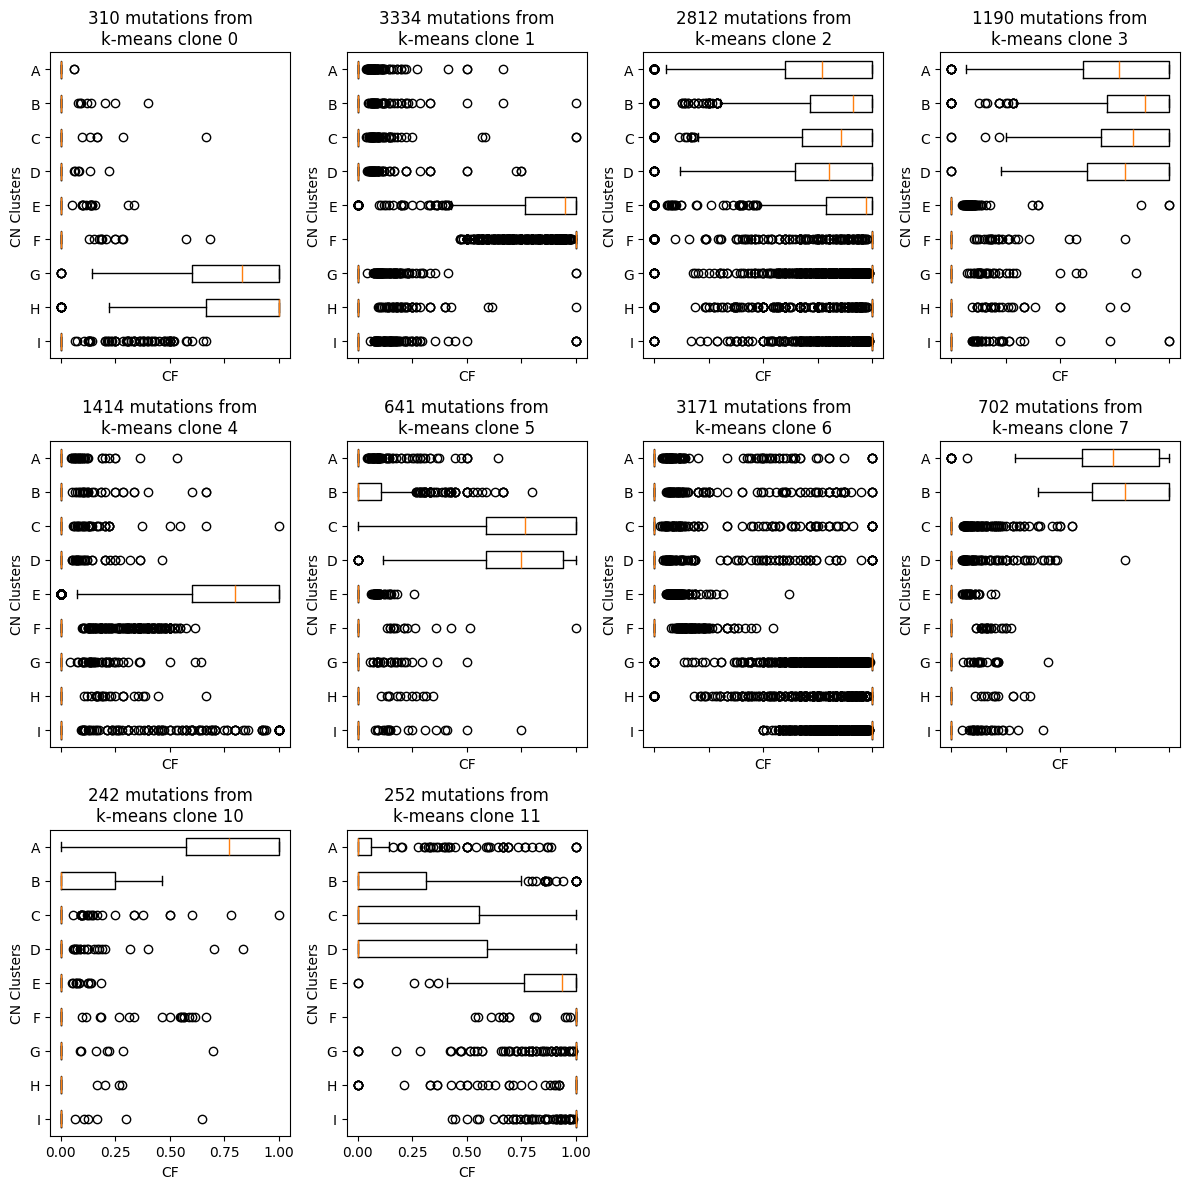

In [14]:
import matplotlib.pyplot as plt
import numpy as np

clusters = sorted(mutation_group_update["clone"].unique())
n_clusters = len(clusters)

# Set up subplot grid: 2 columns
n_cols = 4
n_rows = (n_clusters + 5) // n_cols

fig, axes = plt.subplots(
    nrows=n_rows, ncols=n_cols,
    figsize=(12, 4 * n_rows),
    sharex=True
)

axes = axes.flatten()

# Define explicit CN cluster order
cn_order = sorted(F.index.unique())[::-1]  # or use a fixed list if known: ['A','B','C','D','E','F','G','H','I']
print(cn_order)

for i, cluster in enumerate(clusters):
    ax = axes[i]

    # Get mutations for this cluster
    mutations_in_cluster = mutation_group_update[mutation_group_update["clone"] == cluster]["mutation"]

    df = F[mutations_in_cluster]

    # Ensure consistent y-axis order (A→I)
    df = df.loc[cn_order]

    F_clust = df.to_numpy()

    thres = 0.75
    median = np.median(F_clust, axis=1)
    upper_percentiles = np.percentile(F_clust, axis=1, q=int(100 * thres))
    lower_percentiles = np.percentile(F_clust, axis=1, q=int(100 * (1 - thres)))

    # Horizontal boxplot per clone, sorted A→I
    ax.boxplot(df.T.values, vert=False, tick_labels=df.index)

    ax.set_ylabel("CN Clusters")
    ax.set_xlabel("CF")
    ax.set_title(f"{df.shape[1]} mutations from\nk-means clone {cluster}")

# Hide any unused subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
# plt.savefig("../data/laks/scope/k-means-cell-fractions.pdf")
plt.show()

# Filter out mutations subclonal in multiple clusters in clones

In [279]:
F_bar = pd.read_csv(f"../data/laks/scope/F_bar.csv", index_col=0)
kmeans_clones = pd.read_csv(f"../data/laks/scope/kmeans_labels.csv", index_col=0)
F = pd.read_csv("../data/laks/scope/F.csv", index_col=0)

mutation_groups_to_recluster = [0, 3, 5, 7, 8, 10]

In [280]:
kmeans_clones

,mutation,clone
0,10:100129846:C:A,1
1,10:100185101:A:G,1
2,10:100209326:T:C,2
3,10:100283942:C:T,9
4,10:10086005:G:T,7
...,...,...
14063,X:98278474:C:A,0
14064,X:98452192:T:C,5
14065,X:98700894:C:T,2
14066,X:99136386:C:T,1


In [281]:
check_for = {
    0: [6, 7],
    3: [0, 1],
    5: [2, 3],
    7: [0, 1],
    8: [0, 1],
    10: [0, 1],
}

In [282]:
mutation_group_to_recluster = 0
counter = 0

def run(mutation_group_to_recluster, counter, kmeans_clones, thres=0.15):

    mutations_of_int = kmeans_clones[kmeans_clones['clone'] == mutation_group_to_recluster]['mutation']
    F_int = F.loc[:, mutations_of_int]
    X = F_int.to_numpy().T
    X_int = X[:, check_for[mutation_group_to_recluster]]
    mask = (X_int[:, 0] > thres) & (X_int[:, 0] < 1 - thres) & (X_int[:, 1] > thres) & (X_int[:, 1] < 1 - thres)
    mask_df = pd.DataFrame(mask, index=F_int.T.index)
    mask_df.index.name = 'mutation'
    mask_df.columns = ['seg']
    kmeans_updated = pd.merge(kmeans_clones, mask_df, on='mutation', how='left')
    df = kmeans_updated
    df["clone"] = np.where(df["seg"] == True, 12 + counter, df["clone"])

    return kmeans_updated[['mutation', 'clone']]

In [283]:
kmeans_clones_t = kmeans_clones.copy()

for i, mutation_group_to_recluster in enumerate(mutation_groups_to_recluster):

    kmeans_clones_t = run(mutation_group_to_recluster, i, kmeans_clones_t, thres=0.25)
    print(kmeans_clones_t['clone'].value_counts())

clone
6     3133
1     2406
2     1788
4     1400
3     1186
8     1126
9      953
7      685
5      640
0      291
10     248
11     193
12      19
Name: count, dtype: int64
clone
6     3133
1     2406
2     1788
4     1400
8     1126
3      968
9      953
7      685
5      640
0      291
10     248
13     218
11     193
12      19
Name: count, dtype: int64
clone
6     3133
1     2406
2     1788
4     1400
8     1126
3      968
9      953
7      685
5      495
0      291
10     248
13     218
11     193
14     145
12      19
Name: count, dtype: int64
clone
6     3133
1     2406
2     1788
4     1400
8     1126
3      968
9      953
7      536
5      495
0      291
10     248
13     218
11     193
15     149
14     145
12      19
Name: count, dtype: int64
clone
6     3133
1     2406
2     1788
4     1400
3      968
9      953
8      720
7      536
5      495
16     406
0      291
10     248
13     218
11     193
15     149
14     145
12      19
Name: count, dtype: int64
clone
6     313

In [284]:
import matplotlib.pyplot as plt
import numpy as np

def plot_cell_fractions(clone_labels):

    clusters = sorted(clone_labels["clone"].unique())
    n_clusters = len(clusters)

    # Set up subplot grid: 2 columns
    n_cols = 4
    n_rows = (n_clusters + 5) // n_cols

    fig, axes = plt.subplots(
        nrows=n_rows, ncols=n_cols,
        figsize=(12, 4 * n_rows),
        sharex=True
    )

    axes = axes.flatten()

    # Define explicit CN cluster order
    cn_order = sorted(F.index.unique())[::-1]  # or use a fixed list if known: ['A','B','C','D','E','F','G','H','I']
    print(cn_order)

    for i, cluster in enumerate(clusters):
        ax = axes[i]

        # Get mutations for this cluster
        mutations_in_cluster = clone_labels[clone_labels["clone"] == cluster]["mutation"]

        df = F[mutations_in_cluster]

        # Ensure consistent y-axis order (A→I)
        df = df.loc[cn_order]

        F_clust = df.to_numpy()

        thres = 0.75
        median = np.median(F_clust, axis=1)
        upper_percentiles = np.percentile(F_clust, axis=1, q=int(100 * thres))
        lower_percentiles = np.percentile(F_clust, axis=1, q=int(100 * (1 - thres)))

        # Horizontal boxplot per clone, sorted A→I
        ax.boxplot(df.T.values, vert=False, tick_labels=df.index)

        ax.set_ylabel("CN Clusters")
        ax.set_xlabel("CF")
        ax.set_title(f"{df.shape[1]} mutations from\nk-means clone {cluster}")

    # Hide any unused subplots
    for j in range(i + 1, len(axes)):
        fig.delaxes(axes[j])

    plt.tight_layout()
    # plt.savefig("../data/laks/scope/k-means-cell-fractions.pdf")
    plt.show()

['I', 'H', 'G', 'F', 'E', 'D', 'C', 'B', 'A']


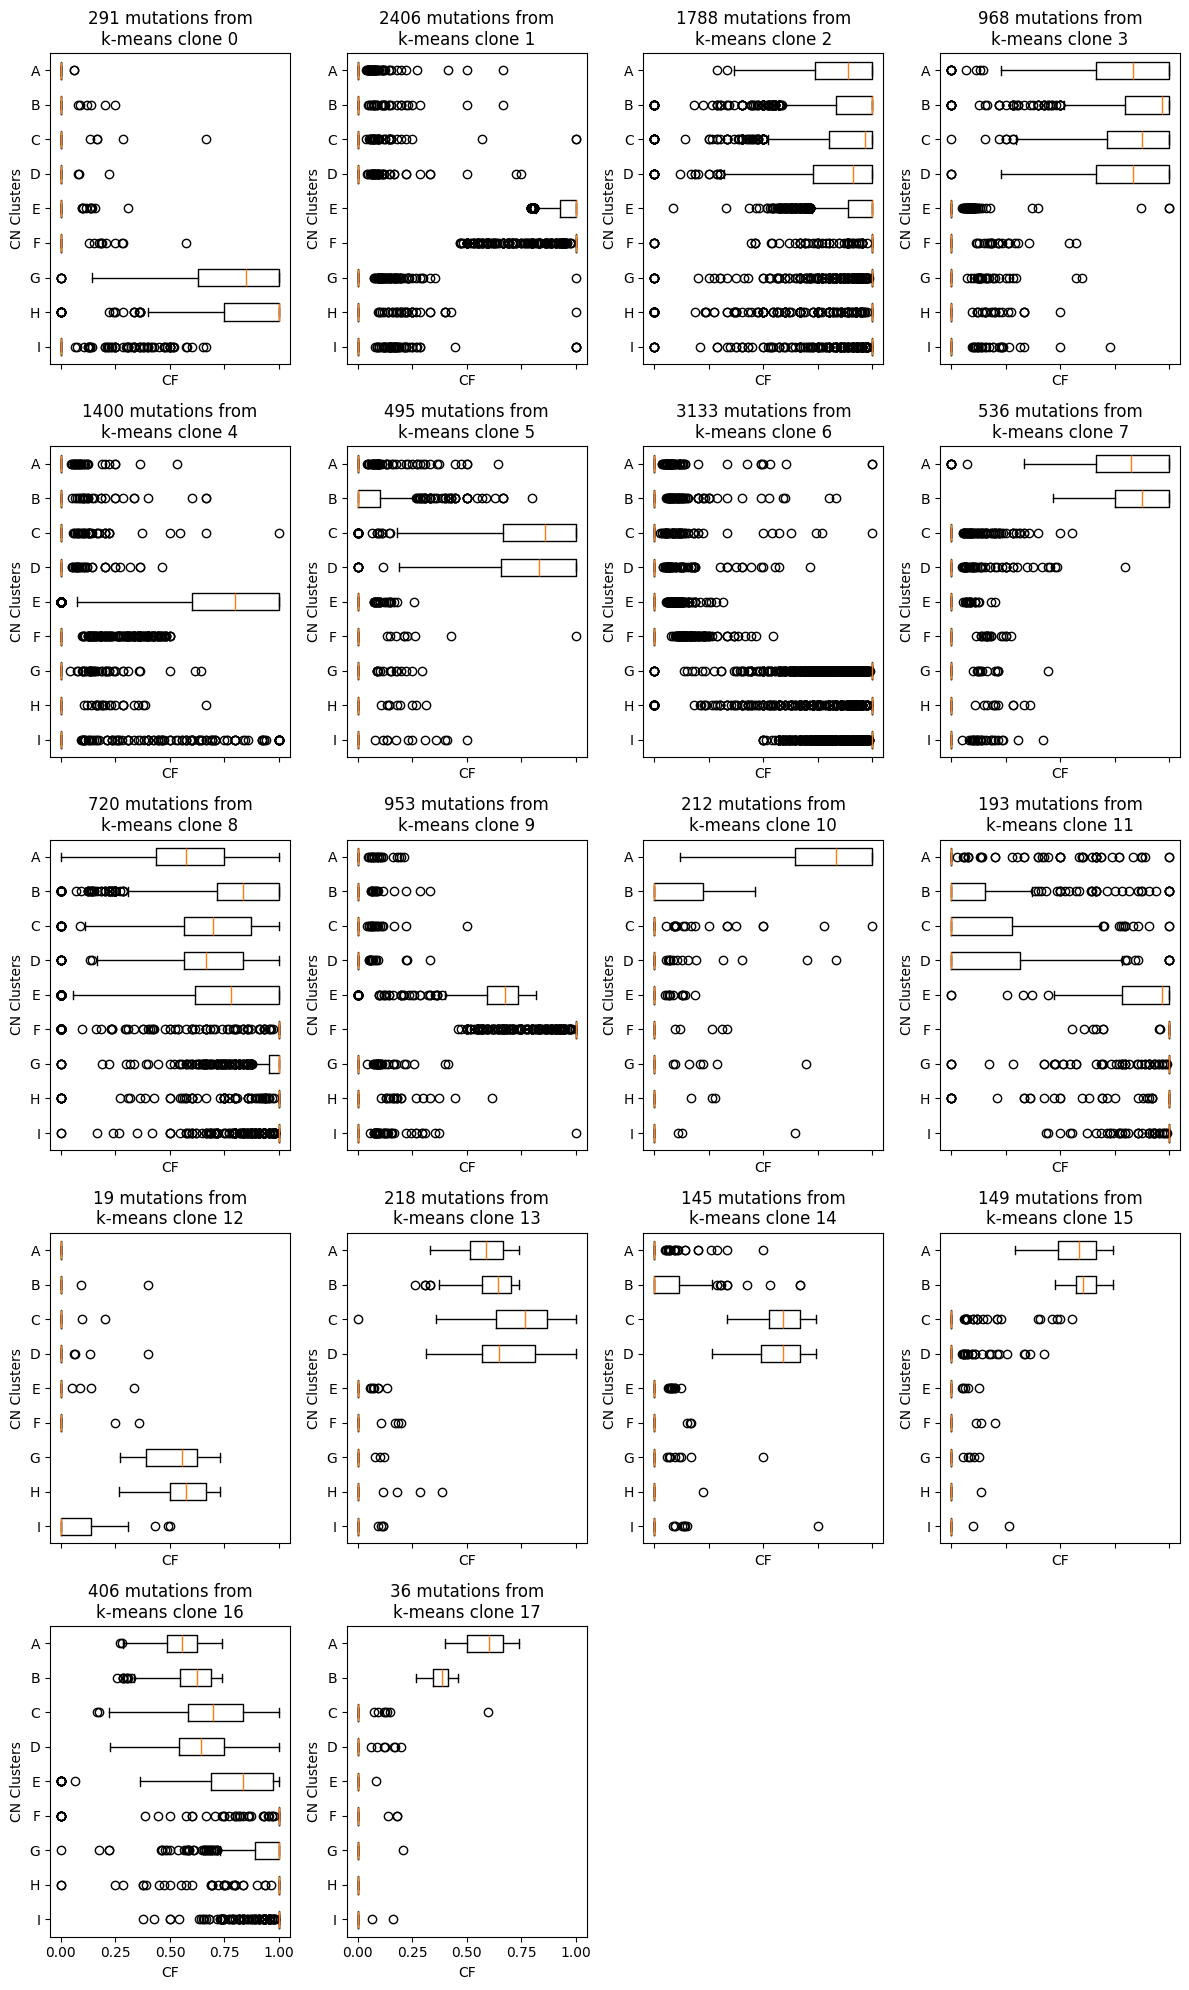

In [285]:
plot_cell_fractions(kmeans_clones_t)

In [286]:
kmeans_clones_t.to_csv("../data/laks/scope/kmeans_labels_filter_25.csv")

# Reclustering 7 and 10

In [12]:
F_bar = pd.read_csv(f"../data/laks/scope/F_bar.csv", index_col=0)
kmeans_clones = pd.read_csv(f"../data/laks/scope/kmeans_labels.csv", index_col=0)
F = pd.read_csv("../data/laks/scope/F.csv", index_col=0)

mutation_groups_to_recluster = [7, 10]

In [13]:
kmeans_clones

,mutation,clone
0,10:100129846:C:A,1
1,10:100185101:A:G,1
2,10:100209326:T:C,2
3,10:100283942:C:T,9
4,10:10086005:G:T,7
...,...,...
14063,X:98278474:C:A,0
14064,X:98452192:T:C,5
14065,X:98700894:C:T,2
14066,X:99136386:C:T,1


In [15]:
mutations_of_int = kmeans_clones[kmeans_clones['clone'].isin(mutation_groups_to_recluster)]['mutation']
mutations_of_int

4         10:10086005:G:T
26       10:105451574:T:G
43       10:107190989:T:C
59       10:109127739:A:G
99       10:113204716:A:G
               ...       
14013      X:82404941:C:T
14043      X:92835183:T:C
14044      X:93127003:G:A
14045      X:93270163:G:C
14061      X:97583306:G:T
Name: mutation, Length: 933, dtype: object

In [16]:
F_int = F.loc[:, mutations_of_int]
F_int

,10:10086005:G:T,10:105451574:T:G,10:107190989:T:C,10:109127739:A:G,10:113204716:A:G,10:115374317:C:A,10:118930351:G:C,10:120287412:T:C,10:122059960:T:G,10:123971252:T:G,...,X:74619531:C:G,X:78702085:C:A,X:79657785:C:T,X:79770255:A:T,X:8035361:C:T,X:82404941:C:T,X:92835183:T:C,X:93127003:G:A,X:93270163:G:C,X:97583306:G:T
clone_id,,,,,,,,,,,,,,,,,,,,,
A,0.833333,0.476190,1.0,0.769231,0.625000,0.666667,1.0,0.454545,0.476190,0.357143,...,0.476190,0.526316,1.0,1.0,0.322581,0.769231,0.666667,0.833333,0.714286,0.434783
B,1.000000,0.526316,1.0,0.818182,0.777778,0.888889,1.0,0.000000,0.909091,0.750000,...,0.777778,0.625000,1.0,1.0,0.000000,0.714286,0.000000,1.000000,0.500000,0.800000
C,0.000000,0.000000,0.0,0.000000,0.055556,0.090909,0.0,0.000000,0.222222,0.000000,...,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
D,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.071429,0.000000
E,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.081633,...,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
F,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.0,0.0,0.095238,0.000000,0.000000,0.000000,0.000000,0.000000
G,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
H,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.2,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
I,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.081633,...,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


                  new_clone
mutation                   
10:10086005:G:T           0
10:105451574:T:G          0
10:107190989:T:C          0
10:109127739:A:G          0
10:113204716:A:G          0


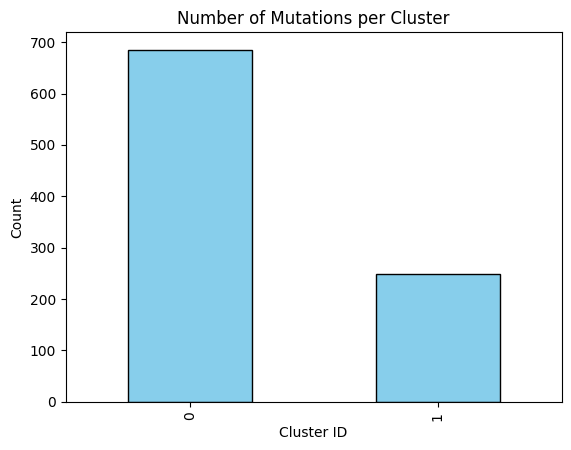

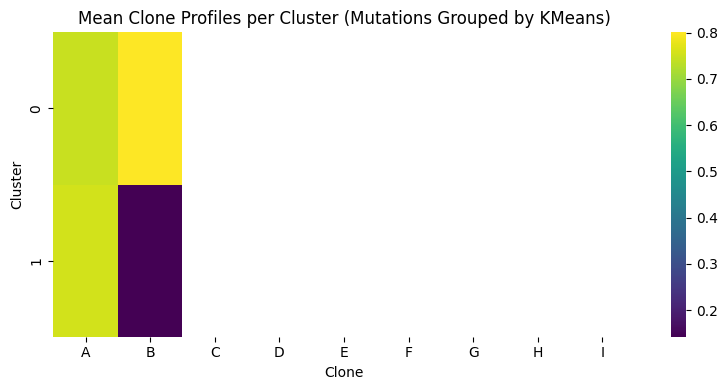

In [23]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming your dataframe is called `df`
# df.index = clone_id (A, B, C, ...)
# df.columns = mutation ids (e.g. '10:10086005:G:T')

df = F_int

# --- Transpose for clustering ---
X = df.T.iloc[:, :2]  # now rows = mutations, columns = clones

# --- Optional: normalize features (important for KMeans) ---
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# --- Choose number of clusters ---
k = 2  # for example
kmeans = KMeans(n_clusters=k, random_state=0, n_init=10)
labels = kmeans.fit_predict(X_scaled)

# --- Add cluster labels to a DataFrame ---
mutation_clusters = pd.DataFrame({
    "mutation": X.index,
    "new_clone": labels
}).set_index("mutation")

print(mutation_clusters.head())

# --- Visualize cluster sizes ---
mutation_clusters["new_clone"].value_counts().sort_index().plot.bar(
    color='skyblue', edgecolor='black'
)
plt.title("Number of Mutations per Cluster")
plt.xlabel("Cluster ID")
plt.ylabel("Count")
plt.show()

# --- Optional: visualize average clone profiles per cluster ---
cluster_profiles = pd.DataFrame(X, index=X.index, columns=df.index)
cluster_profiles["cluster"] = labels
mean_profiles = cluster_profiles.groupby("cluster").mean()

plt.figure(figsize=(8, 4))
sns.heatmap(mean_profiles, cmap="viridis", annot=False)
plt.title("Mean Clone Profiles per Cluster (Mutations Grouped by KMeans)")
plt.xlabel("Clone")
plt.ylabel("Cluster")
plt.tight_layout()
plt.show()


In [25]:
kmeans_updated = pd.merge(kmeans_clones, mutation_clusters, on='mutation', how='left')
kmeans_updated

,mutation,clone,new_clone
0,10:100129846:C:A,1,NaN
1,10:100185101:A:G,1,NaN
2,10:100209326:T:C,2,NaN
3,10:100283942:C:T,9,NaN
4,10:10086005:G:T,7,0.0
...,...,...,...
14063,X:98278474:C:A,0,NaN
14064,X:98452192:T:C,5,NaN
14065,X:98700894:C:T,2,NaN
14066,X:99136386:C:T,1,NaN


In [28]:
kmeans_updated['new_clone'].value_counts()

new_clone
0.0    685
1.0    248
Name: count, dtype: int64

In [ ]:
df = kmeans_updated
df["clone"] = np.where(
    df["new_clone"].isna(),  # condition 1: if NaN
    df["clone"],              # keep old value
    np.where(
        df["new_clone"] == 0, 7,  # condition 2: if 0 → 7
        np.where(df["new_clone"] == 1, 10, df["clone"])  # condition 3: if 1 → 10
    )
)

In [26]:
kmeans_updated

,mutation,clone,new_clone
0,10:100129846:C:A,1,NaN
1,10:100185101:A:G,1,NaN
2,10:100209326:T:C,2,NaN
3,10:100283942:C:T,9,NaN
4,10:10086005:G:T,7,0.0
...,...,...,...
14063,X:98278474:C:A,0,NaN
14064,X:98452192:T:C,5,NaN
14065,X:98700894:C:T,2,NaN
14066,X:99136386:C:T,1,NaN


In [30]:
F_int

,10:10086005:G:T,10:105451574:T:G,10:107190989:T:C,10:109127739:A:G,10:113204716:A:G,10:115374317:C:A,10:118930351:G:C,10:120287412:T:C,10:122059960:T:G,10:123971252:T:G,...,X:74619531:C:G,X:78702085:C:A,X:79657785:C:T,X:79770255:A:T,X:8035361:C:T,X:82404941:C:T,X:92835183:T:C,X:93127003:G:A,X:93270163:G:C,X:97583306:G:T
clone_id,,,,,,,,,,,,,,,,,,,,,
A,0.833333,0.476190,1.0,0.769231,0.625000,0.666667,1.0,0.454545,0.476190,0.357143,...,0.476190,0.526316,1.0,1.0,0.322581,0.769231,0.666667,0.833333,0.714286,0.434783
B,1.000000,0.526316,1.0,0.818182,0.777778,0.888889,1.0,0.000000,0.909091,0.750000,...,0.777778,0.625000,1.0,1.0,0.000000,0.714286,0.000000,1.000000,0.500000,0.800000
C,0.000000,0.000000,0.0,0.000000,0.055556,0.090909,0.0,0.000000,0.222222,0.000000,...,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
D,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.071429,0.000000
E,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.081633,...,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
F,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.0,0.0,0.095238,0.000000,0.000000,0.000000,0.000000,0.000000
G,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
H,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.2,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
I,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.081633,...,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [32]:
X = F_int.to_numpy().T
X_int = X[:, :2]
X_int

array([[0.83333333, 1.        ],
       [0.47619048, 0.52631579],
       [1.        , 1.        ],
       ...,
       [0.83333333, 1.        ],
       [0.71428571, 0.5       ],
       [0.43478261, 0.8       ]], shape=(933, 2))

In [51]:
thres = 0.3
mask = (X_int[:, 0] > thres) & (X_int[:, 0] < 1 - thres) & (X_int[:, 1] > thres) & (X_int[:, 1] < 1 - thres)
np.sum(mask)

np.int64(130)

In [56]:
mask_df = pd.DataFrame(mask, index=F_int.T.index)
mask_df.index.name = 'mutation'
mask_df.columns = ['seg']
mask_df

,seg
mutation,
10:10086005:G:T,False
10:105451574:T:G,True
10:107190989:T:C,False
10:109127739:A:G,False
10:113204716:A:G,False
...,...
X:82404941:C:T,False
X:92835183:T:C,False
X:93127003:G:A,False


In [63]:
kmeans_reupdated = pd.merge(kmeans_updated, mask_df, on='mutation', how='left')
kmeans_reupdated

,mutation,clone,new_clone,seg
0,10:100129846:C:A,1,NaN,NaN
1,10:100185101:A:G,1,NaN,NaN
2,10:100209326:T:C,2,NaN,NaN
3,10:100283942:C:T,9,NaN,NaN
4,10:10086005:G:T,7,0.0,False
...,...,...,...,...
14063,X:98278474:C:A,0,NaN,NaN
14064,X:98452192:T:C,5,NaN,NaN
14065,X:98700894:C:T,2,NaN,NaN
14066,X:99136386:C:T,1,NaN,NaN


In [64]:
df = kmeans_reupdated

df["clone"] = np.where(df["seg"] == True, 12,    # Rule 1
               np.where(df["new_clone"].isna(), df["clone"],  # Rule 2
               np.where(df["new_clone"] == 0, 7,  # Rule 3
               np.where(df["new_clone"] == 1, 10, df["clone"]))))  # Rule 4

df

,mutation,clone,new_clone,seg
0,10:100129846:C:A,1,NaN,NaN
1,10:100185101:A:G,1,NaN,NaN
2,10:100209326:T:C,2,NaN,NaN
3,10:100283942:C:T,9,NaN,NaN
4,10:10086005:G:T,7,0.0,False
...,...,...,...,...
14063,X:98278474:C:A,0,NaN,NaN
14064,X:98452192:T:C,5,NaN,NaN
14065,X:98700894:C:T,2,NaN,NaN
14066,X:99136386:C:T,1,NaN,NaN


In [65]:
df['clone'].value_counts()

clone
6     3133
1     2406
2     1788
4     1400
3     1186
8     1126
9      953
5      640
7      582
0      310
10     221
11     193
12     130
Name: count, dtype: int64

In [66]:
df

,mutation,clone,new_clone,seg
0,10:100129846:C:A,1,NaN,NaN
1,10:100185101:A:G,1,NaN,NaN
2,10:100209326:T:C,2,NaN,NaN
3,10:100283942:C:T,9,NaN,NaN
4,10:10086005:G:T,7,0.0,False
...,...,...,...,...
14063,X:98278474:C:A,0,NaN,NaN
14064,X:98452192:T:C,5,NaN,NaN
14065,X:98700894:C:T,2,NaN,NaN
14066,X:99136386:C:T,1,NaN,NaN


['I', 'H', 'G', 'F', 'E', 'D', 'C', 'B', 'A']


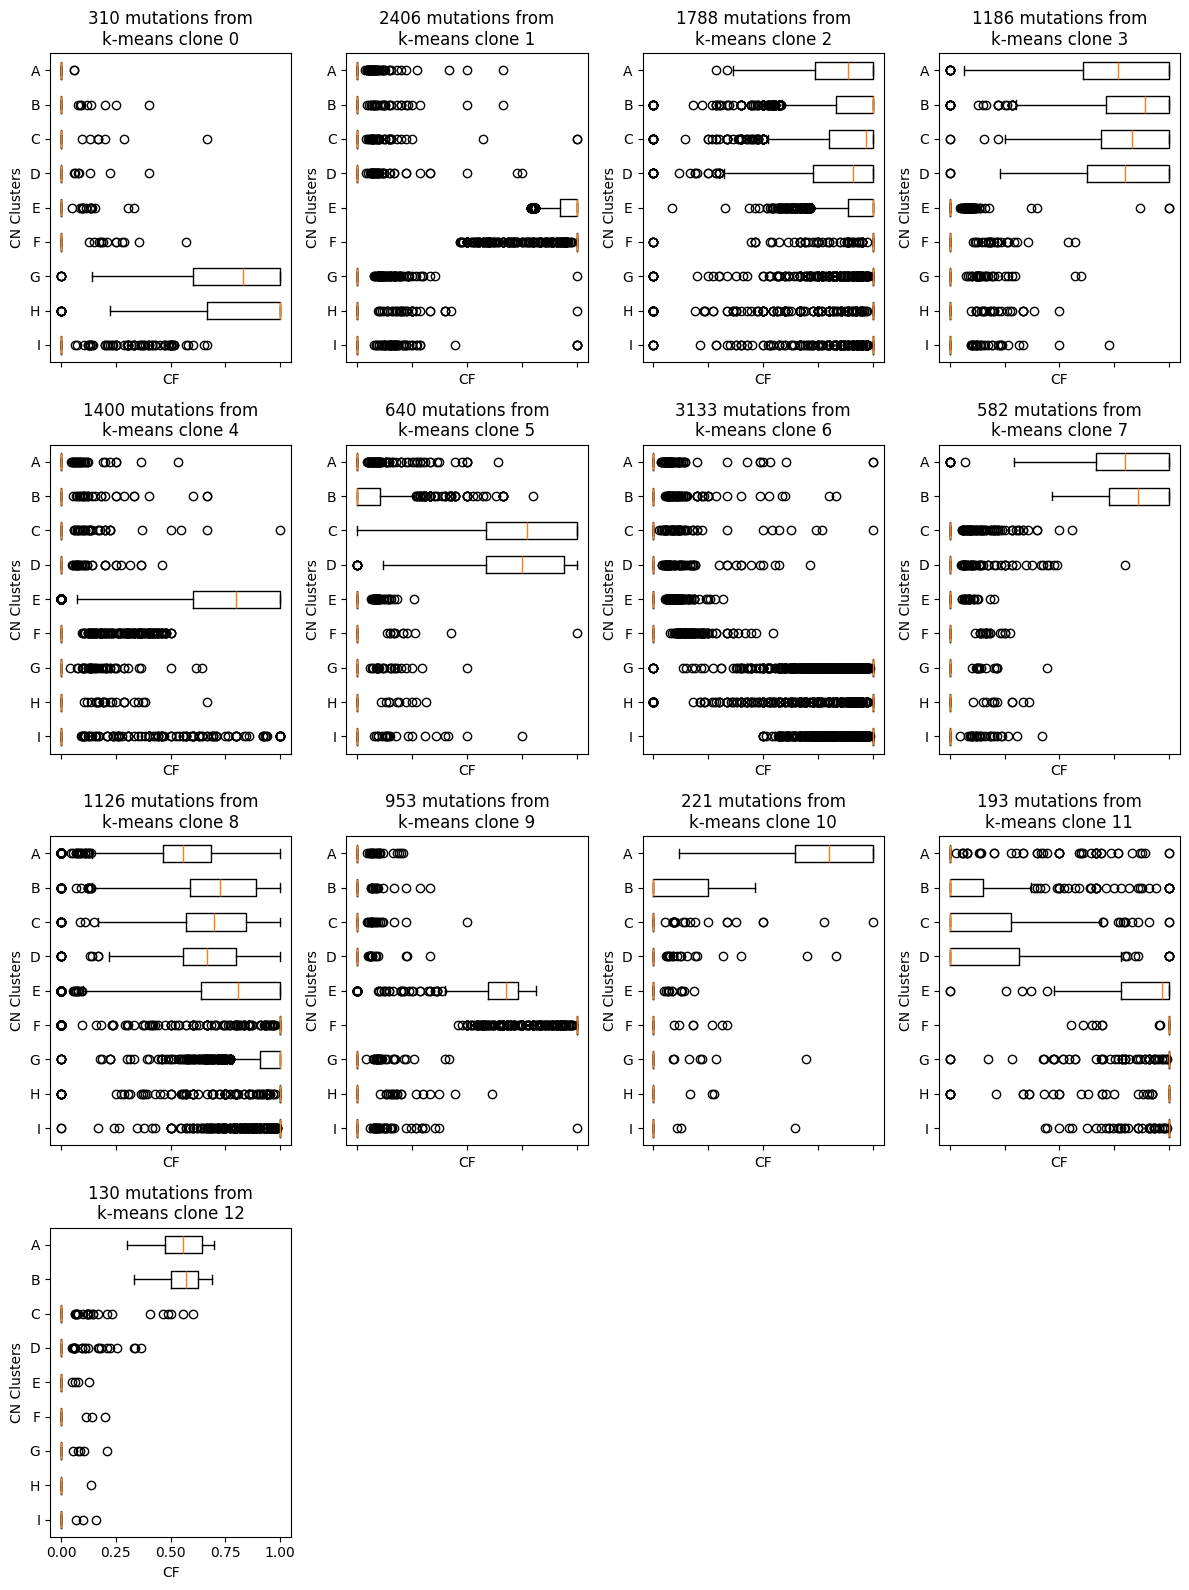

In [60]:
import matplotlib.pyplot as plt
import numpy as np

clusters = sorted(kmeans_reupdated["clone"].unique())
n_clusters = len(clusters)

# Set up subplot grid: 2 columns
n_cols = 4
n_rows = (n_clusters + 5) // n_cols

fig, axes = plt.subplots(
    nrows=n_rows, ncols=n_cols,
    figsize=(12, 4 * n_rows),
    sharex=True
)

axes = axes.flatten()

# Define explicit CN cluster order
cn_order = sorted(F.index.unique())[::-1]  # or use a fixed list if known: ['A','B','C','D','E','F','G','H','I']
print(cn_order)

for i, cluster in enumerate(clusters):
    ax = axes[i]

    # Get mutations for this cluster
    mutations_in_cluster = kmeans_reupdated[kmeans_reupdated["clone"] == cluster]["mutation"]

    df = F[mutations_in_cluster]

    # Ensure consistent y-axis order (A→I)
    df = df.loc[cn_order]

    F_clust = df.to_numpy()

    thres = 0.75
    median = np.median(F_clust, axis=1)
    upper_percentiles = np.percentile(F_clust, axis=1, q=int(100 * thres))
    lower_percentiles = np.percentile(F_clust, axis=1, q=int(100 * (1 - thres)))

    # Horizontal boxplot per clone, sorted A→I
    ax.boxplot(df.T.values, vert=False, tick_labels=df.index)

    ax.set_ylabel("CN Clusters")
    ax.set_xlabel("CF")
    ax.set_title(f"{df.shape[1]} mutations from\nk-means clone {cluster}")

# Hide any unused subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
# plt.savefig("../data/laks/scope/k-means-cell-fractions.pdf")
plt.show()

In [68]:
df[['mutation', 'clone']].to_csv("../data/laks/scope/kmeans_labels_7_10.csv")

## Do it for 5 also

In [69]:
mutation_groups_to_recluster = [5]

In [70]:
mutations_of_int = kmeans_clones[kmeans_clones['clone'].isin(mutation_groups_to_recluster)]['mutation']
mutations_of_int

10       10:101907279:T:C
12       10:102073603:A:G
38       10:106938679:G:C
55       10:108882630:T:A
79       10:110630313:A:G
               ...       
13952      X:62072067:C:A
13962      X:64878417:G:T
14020      X:83474222:A:T
14041       X:9233723:A:T
14064      X:98452192:T:C
Name: mutation, Length: 640, dtype: object

In [71]:
F_int = F.loc[:, mutations_of_int]
F_int

,10:101907279:T:C,10:102073603:A:G,10:106938679:G:C,10:108882630:T:A,10:110630313:A:G,10:112882221:C:A,10:119698265:C:T,10:123769805:G:A,10:130219365:T:A,10:134284178:A:G,...,X:44383278:T:A,X:45210579:A:T,X:46937246:G:A,X:51545974:C:A,X:5586199:T:C,X:62072067:C:A,X:64878417:G:T,X:83474222:A:T,X:9233723:A:T,X:98452192:T:C
clone_id,,,,,,,,,,,,,,,,,,,,,
A,0.000000,0.047619,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.090909,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.0
B,0.000000,0.000000,0.000000,0.000000,0.00,0.125000,0.500000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.181818,0.000000,0.000000,0.00,0.000000,0.0
C,0.357143,0.909091,0.833333,0.583333,0.50,0.416667,1.000000,0.600000,0.476190,0.714286,...,0.769231,0.588235,1.000000,0.476190,0.909091,0.066667,0.111111,0.50,0.000000,1.0
D,0.200000,0.833333,0.666667,0.666667,0.75,0.588235,0.909091,0.277778,0.727273,0.512821,...,1.000000,0.428571,0.769231,0.818182,0.714286,0.562500,0.375000,0.25,0.588235,1.0
E,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.080000,0.065574,0.000000,...,0.000000,0.000000,0.080000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.0
F,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.0
G,0.000000,0.000000,0.086957,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.0
H,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.142857,0.000000,0.00,0.000000,0.0
I,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.0


In [72]:
X = F_int.to_numpy().T
X_int = X[:, 2:4]
X_int

array([[0.35714286, 0.2       ],
       [0.90909091, 0.83333333],
       [0.83333333, 0.66666667],
       ...,
       [0.5       , 0.25      ],
       [0.        , 0.58823529],
       [1.        , 1.        ]], shape=(640, 2))

In [83]:
thres = 0.25
mask = (X_int[:, 0] > thres) & (X_int[:, 0] < 1 - thres) & (X_int[:, 1] > thres) & (X_int[:, 1] < 1 - thres)
np.sum(mask)

np.int64(145)

In [84]:
mask_df = pd.DataFrame(mask, index=F_int.T.index)
mask_df.index.name = 'mutation'
mask_df.columns = ['seg']
mask_df

,seg
mutation,
10:101907279:T:C,False
10:102073603:A:G,False
10:106938679:G:C,False
10:108882630:T:A,True
10:110630313:A:G,False
...,...
X:62072067:C:A,False
X:64878417:G:T,False
X:83474222:A:T,False


In [85]:
kmeans_rereupdated = pd.merge(kmeans_reupdated, mask_df, on='mutation', how='left', suffixes=['', '_5'])
kmeans_rereupdated

,mutation,clone,new_clone,seg,seg_5
0,10:100129846:C:A,1,NaN,NaN,NaN
1,10:100185101:A:G,1,NaN,NaN,NaN
2,10:100209326:T:C,2,NaN,NaN,NaN
3,10:100283942:C:T,9,NaN,NaN,NaN
4,10:10086005:G:T,7,0.0,False,NaN
...,...,...,...,...,...
14063,X:98278474:C:A,0,NaN,NaN,NaN
14064,X:98452192:T:C,5,NaN,NaN,False
14065,X:98700894:C:T,2,NaN,NaN,NaN
14066,X:99136386:C:T,1,NaN,NaN,NaN


In [86]:
df = kmeans_rereupdated

df["clone"] = np.where(df["seg_5"] == True, 13, df["clone"])

df

,mutation,clone,new_clone,seg,seg_5
0,10:100129846:C:A,1,NaN,NaN,NaN
1,10:100185101:A:G,1,NaN,NaN,NaN
2,10:100209326:T:C,2,NaN,NaN,NaN
3,10:100283942:C:T,9,NaN,NaN,NaN
4,10:10086005:G:T,7,0.0,False,NaN
...,...,...,...,...,...
14063,X:98278474:C:A,0,NaN,NaN,NaN
14064,X:98452192:T:C,5,NaN,NaN,False
14065,X:98700894:C:T,2,NaN,NaN,NaN
14066,X:99136386:C:T,1,NaN,NaN,NaN


In [87]:
df['clone'].value_counts()

clone
6     3133
1     2406
2     1788
4     1400
3     1186
8     1126
9      953
7      582
5      495
0      310
10     221
11     193
13     145
12     130
Name: count, dtype: int64

['I', 'H', 'G', 'F', 'E', 'D', 'C', 'B', 'A']


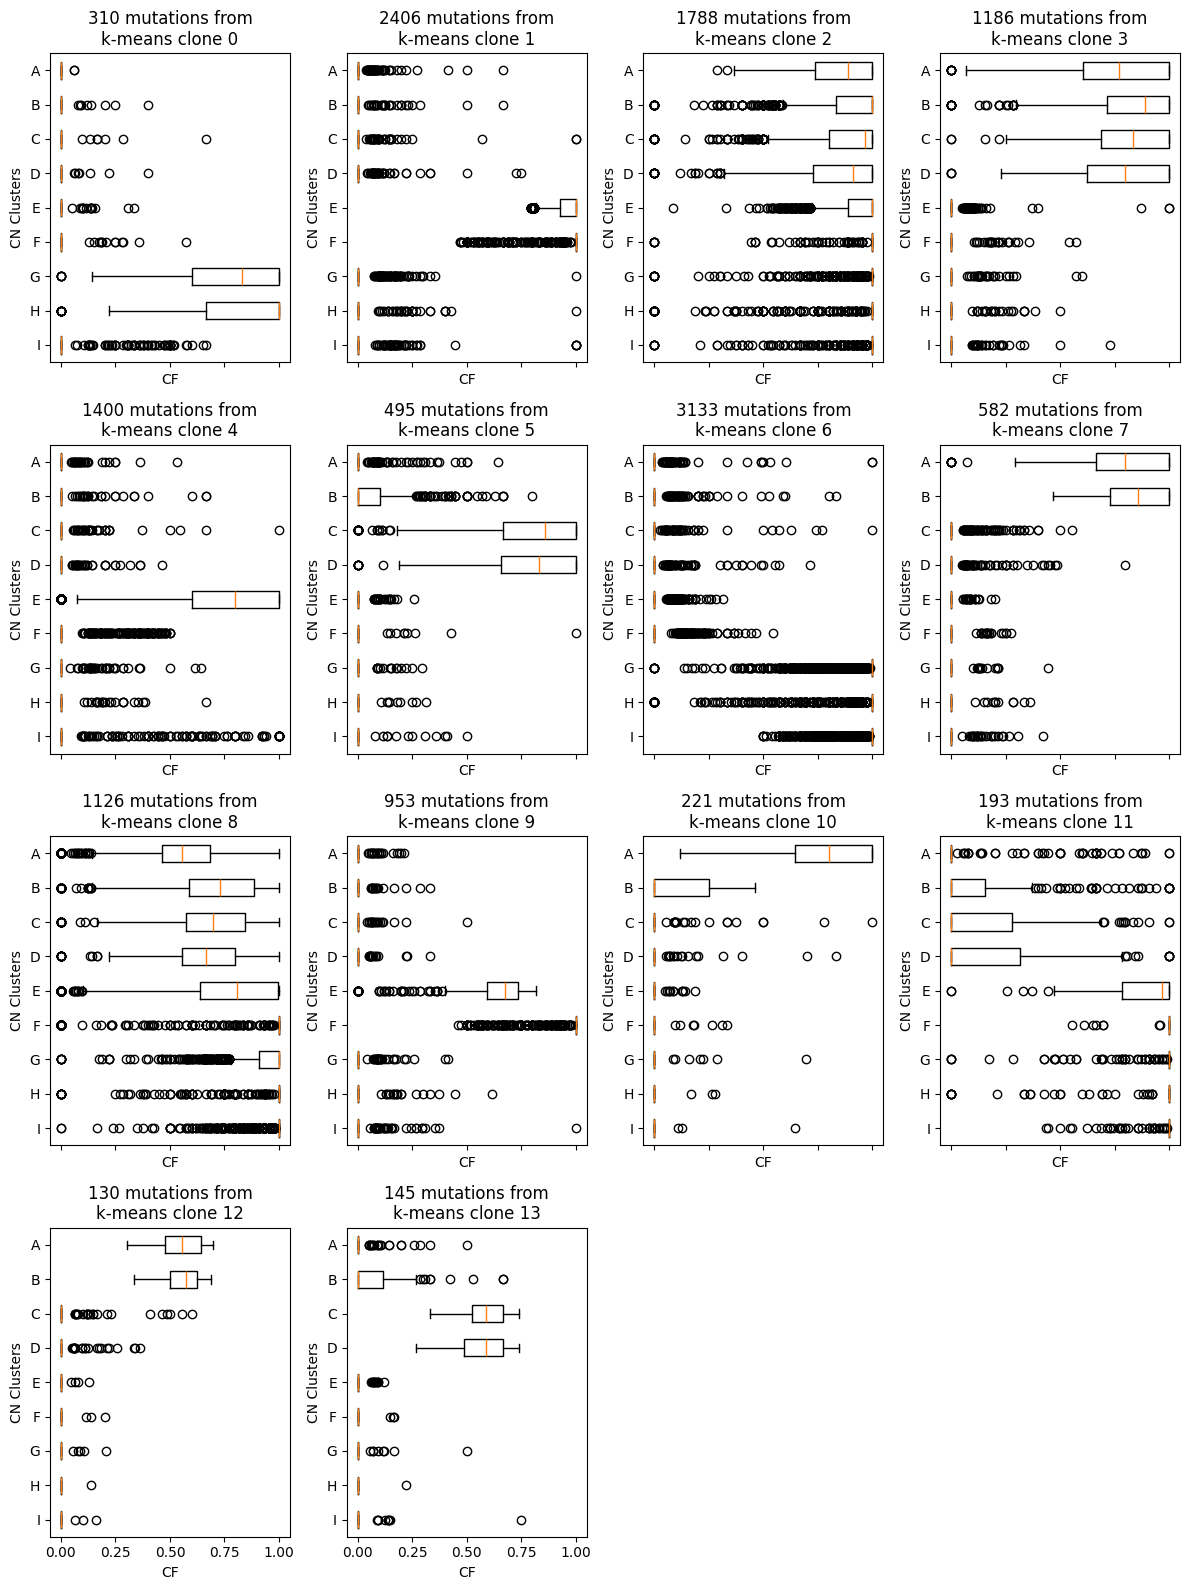

In [88]:
import matplotlib.pyplot as plt
import numpy as np

clusters = sorted(kmeans_rereupdated["clone"].unique())
n_clusters = len(clusters)

# Set up subplot grid: 2 columns
n_cols = 4
n_rows = (n_clusters + 5) // n_cols

fig, axes = plt.subplots(
    nrows=n_rows, ncols=n_cols,
    figsize=(12, 4 * n_rows),
    sharex=True
)

axes = axes.flatten()

# Define explicit CN cluster order
cn_order = sorted(F.index.unique())[::-1]  # or use a fixed list if known: ['A','B','C','D','E','F','G','H','I']
print(cn_order)

for i, cluster in enumerate(clusters):
    ax = axes[i]

    # Get mutations for this cluster
    mutations_in_cluster = kmeans_rereupdated[kmeans_rereupdated["clone"] == cluster]["mutation"]

    df = F[mutations_in_cluster]

    # Ensure consistent y-axis order (A→I)
    df = df.loc[cn_order]

    F_clust = df.to_numpy()

    thres = 0.75
    median = np.median(F_clust, axis=1)
    upper_percentiles = np.percentile(F_clust, axis=1, q=int(100 * thres))
    lower_percentiles = np.percentile(F_clust, axis=1, q=int(100 * (1 - thres)))

    # Horizontal boxplot per clone, sorted A→I
    ax.boxplot(df.T.values, vert=False, tick_labels=df.index)

    ax.set_ylabel("CN Clusters")
    ax.set_xlabel("CF")
    ax.set_title(f"{df.shape[1]} mutations from\nk-means clone {cluster}")

# Hide any unused subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
# plt.savefig("../data/laks/scope/k-means-cell-fractions.pdf")
plt.show()

In [91]:
kmeans_rereupdated[['mutation', 'clone']].to_csv("../data/laks/scope/kmeans_labels_7_10_5.csv")

## Do it for 3 also

In [92]:
mutation_groups_to_recluster = [3]

In [93]:
mutations_of_int = kmeans_clones[kmeans_clones['clone'].isin(mutation_groups_to_recluster)]['mutation']
mutations_of_int

18       10:104152330:G:C
27       10:105546988:C:A
76       10:110415132:A:G
95       10:112438592:T:A
117      10:115562029:C:T
               ...       
13977      X:69481870:A:G
13979      X:70340107:G:C
14012      X:82212463:T:G
14024      X:86168089:G:C
14029      X:86958128:G:A
Name: mutation, Length: 1186, dtype: object

In [94]:
F_int = F.loc[:, mutations_of_int]
F_int

,10:104152330:G:C,10:105546988:C:A,10:110415132:A:G,10:112438592:T:A,10:115562029:C:T,10:119456409:T:A,10:119481859:G:C,10:120538446:G:C,10:130503306:G:C,10:130859170:G:C,...,X:30040479:C:T,X:32205631:G:C,X:62622917:A:G,X:65624902:A:C,X:6686909:A:G,X:69481870:A:G,X:70340107:G:C,X:82212463:T:G,X:86168089:G:C,X:86958128:G:A
clone_id,,,,,,,,,,,,,,,,,,,,,
A,1.000000,0.416667,0.454545,0.500000,0.526316,0.344828,0.833333,0.555556,0.625000,0.800000,...,1.0,1.000000,1.0,0.370370,0.714286,0.370370,0.476190,1.0,1.0,0.909091
B,1.000000,0.909091,0.909091,0.909091,0.769231,0.909091,0.769231,0.625000,0.714286,0.666667,...,1.0,1.000000,1.0,0.588235,1.000000,0.666667,0.526316,1.0,1.0,1.000000
C,0.909091,0.625000,0.714286,0.769231,1.000000,0.666667,1.000000,1.000000,0.933333,0.800000,...,1.0,1.000000,1.0,0.909091,1.000000,0.769231,0.588235,1.0,1.0,1.000000
D,0.588235,0.588235,1.000000,0.625000,0.769231,0.588235,1.000000,1.000000,0.571429,0.645161,...,1.0,0.857143,1.0,0.416667,0.823529,0.625000,1.000000,1.0,1.0,1.000000
E,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000
F,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000
G,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000
H,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000
I,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000


In [95]:
X = F_int.to_numpy().T
X_int = X[:, :2]
X_int

array([[1.        , 1.        ],
       [0.41666667, 0.90909091],
       [0.45454545, 0.90909091],
       ...,
       [1.        , 1.        ],
       [1.        , 1.        ],
       [0.90909091, 1.        ]], shape=(1186, 2))

In [97]:
thres = 0.3
mask = (X_int[:, 0] > thres) & (X_int[:, 0] < 1 - thres) & (X_int[:, 1] > thres) & (X_int[:, 1] < 1 - thres)
np.sum(mask)

np.int64(145)

In [98]:
mask_df = pd.DataFrame(mask, index=F_int.T.index)
mask_df.index.name = 'mutation'
mask_df.columns = ['seg']
mask_df

,seg
mutation,
10:104152330:G:C,False
10:105546988:C:A,False
10:110415132:A:G,False
10:112438592:T:A,False
10:115562029:C:T,False
...,...
X:69481870:A:G,True
X:70340107:G:C,True
X:82212463:T:G,False


In [99]:
kmeans_rerereupdated = pd.merge(kmeans_rereupdated, mask_df, on='mutation', how='left', suffixes=['', '_3'])
kmeans_rerereupdated

,mutation,clone,new_clone,seg,seg_5,seg_3
0,10:100129846:C:A,1,NaN,NaN,NaN,NaN
1,10:100185101:A:G,1,NaN,NaN,NaN,NaN
2,10:100209326:T:C,2,NaN,NaN,NaN,NaN
3,10:100283942:C:T,9,NaN,NaN,NaN,NaN
4,10:10086005:G:T,7,0.0,False,NaN,NaN
...,...,...,...,...,...,...
14063,X:98278474:C:A,0,NaN,NaN,NaN,NaN
14064,X:98452192:T:C,5,NaN,NaN,False,NaN
14065,X:98700894:C:T,2,NaN,NaN,NaN,NaN
14066,X:99136386:C:T,1,NaN,NaN,NaN,NaN


In [100]:
df = kmeans_rerereupdated

df["clone"] = np.where(df["seg_3"] == True, 14, df["clone"])

df

,mutation,clone,new_clone,seg,seg_5,seg_3
0,10:100129846:C:A,1,NaN,NaN,NaN,NaN
1,10:100185101:A:G,1,NaN,NaN,NaN,NaN
2,10:100209326:T:C,2,NaN,NaN,NaN,NaN
3,10:100283942:C:T,9,NaN,NaN,NaN,NaN
4,10:10086005:G:T,7,0.0,False,NaN,NaN
...,...,...,...,...,...,...
14063,X:98278474:C:A,0,NaN,NaN,NaN,NaN
14064,X:98452192:T:C,5,NaN,NaN,False,NaN
14065,X:98700894:C:T,2,NaN,NaN,NaN,NaN
14066,X:99136386:C:T,1,NaN,NaN,NaN,NaN


In [101]:
df['clone'].value_counts()

clone
6     3133
1     2406
2     1788
4     1400
8     1126
3     1041
9      953
7      582
5      495
0      310
10     221
11     193
13     145
14     145
12     130
Name: count, dtype: int64

['I', 'H', 'G', 'F', 'E', 'D', 'C', 'B', 'A']


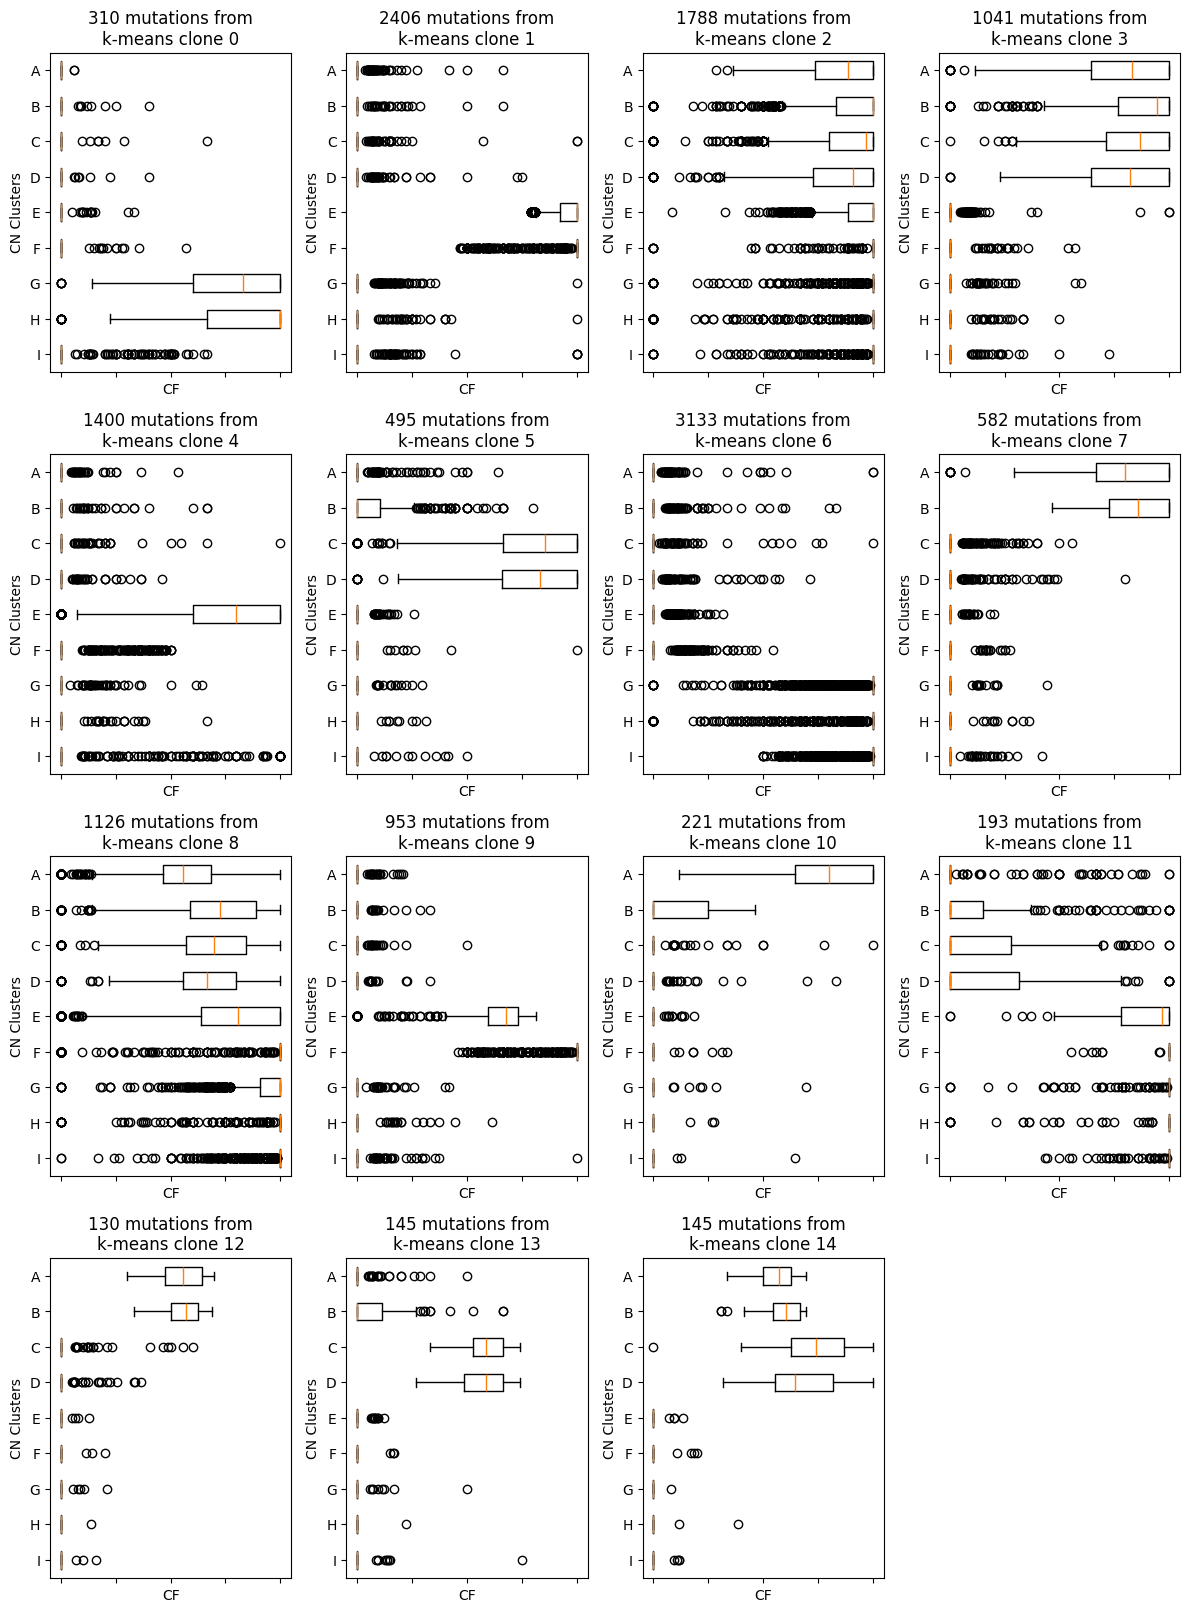

In [102]:
import matplotlib.pyplot as plt
import numpy as np

clusters = sorted(kmeans_rerereupdated["clone"].unique())
n_clusters = len(clusters)

# Set up subplot grid: 2 columns
n_cols = 4
n_rows = (n_clusters + 5) // n_cols

fig, axes = plt.subplots(
    nrows=n_rows, ncols=n_cols,
    figsize=(12, 4 * n_rows),
    sharex=True
)

axes = axes.flatten()

# Define explicit CN cluster order
cn_order = sorted(F.index.unique())[::-1]  # or use a fixed list if known: ['A','B','C','D','E','F','G','H','I']
print(cn_order)

for i, cluster in enumerate(clusters):
    ax = axes[i]

    # Get mutations for this cluster
    mutations_in_cluster = kmeans_rerereupdated[kmeans_rerereupdated["clone"] == cluster]["mutation"]

    df = F[mutations_in_cluster]

    # Ensure consistent y-axis order (A→I)
    df = df.loc[cn_order]

    F_clust = df.to_numpy()

    thres = 0.75
    median = np.median(F_clust, axis=1)
    upper_percentiles = np.percentile(F_clust, axis=1, q=int(100 * thres))
    lower_percentiles = np.percentile(F_clust, axis=1, q=int(100 * (1 - thres)))

    # Horizontal boxplot per clone, sorted A→I
    ax.boxplot(df.T.values, vert=False, tick_labels=df.index)

    ax.set_ylabel("CN Clusters")
    ax.set_xlabel("CF")
    ax.set_title(f"{df.shape[1]} mutations from\nk-means clone {cluster}")

# Hide any unused subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
# plt.savefig("../data/laks/scope/k-means-cell-fractions.pdf")
plt.show()